In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('lamost_full')
df

,obsid,uid,gp_id,designation,obsdate,lmjd,mjd,planid,spid,fiberid,...,tcomment,offsets,offsets_v,ra,dec,wd_subclass,teff,teff_err,logg,logg_err
0,101076,G12763484624375,2676893926929699200,J220838.58-013731.7,2011-10-24,55859,55858,F5902,1,76,...,.,0,0.0,332.160763,-1.625490,DA,-9999.00,-9999.00,-9999.000,-9999.000
1,101151,G12762587004699,2677056689010163456,J220823.66-011534.2,2011-10-24,55859,55858,F5902,1,151,...,.,0,0.0,332.098588,-1.259508,DA,24000.00,672.02,8.263,0.076
2,112211,G13351718912434,2679476512239443328,J221640.39+012741.2,2011-10-24,55859,55858,F5902,12,211,...,.,0,0.0,334.168324,1.461445,DA,17122.64,221.39,7.933,0.037
3,116148,G13358737732360,2683213511743993472,J220522.86+021837.5,2011-10-24,55859,55858,F5902,16,148,...,.,0,0.0,331.345250,2.310432,DA,14070.30,215.59,8.063,0.028
4,204023,G8933577968159,2497952567036766848,J025747.26-002737.2,2011-10-24,55859,55858,F5907,4,23,...,No,0,0.0,44.446950,-0.460360,DA,-9999.00,-9999.00,-9999.000,-9999.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15596,823814206,L13969314261795,823814206,J182122.96+183353.4,2020-05-27,58997,58996,GACII277N17M1,14,206,...,XY1829+1759_M1,0,0.0,275.345680,18.564854,DA,26489.80,693.50,7.782,0.092
15597,824005215,L14519339570388,824005215,J162937.34+052355.4,2020-05-27,58997,58996,HD163300N063640M02,5,215,...,14867803720077872,0,0.0,247.405603,5.398735,DAZ,16620.23,76.96,-9999.000,-9999.000
15598,824006121,G14518559500900,4435598234807569536,J164145.72+053537.1,2020-05-27,58997,58996,HD163300N063640M02,6,121,...,LSPM_J1641+0535,0,0.0,250.440521,5.593662,DA,7100.12,45.07,8.647,0.047
15599,824006212,G14518361692417,4435580573901845760,J163942.86+052615.0,2020-05-27,58997,58996,HD163300N063640M02,6,212,...,14866802374096661,0,0.0,249.928587,5.437514,DA,33696.96,312.21,-9999.000,-9999.000


# SNR Lamost

### Koreksi snr lamost

In [7]:
snr = df[(df.snru != -9999) & (df.snru != 9999) & (df.snrg != -9999) & (df.snrg != 9999) & 
         (df.snrr != -9999) & (df.snrr != 9999) & (df.snri != -9999) & (df.snri != 9999) & 
         (df.snrz != -9999) & (df.snrz != 9999)]

### Selecting wd_subclass

In [23]:
wd_subclass = snr[(snr.wd_subclass == 'DA') | (snr.wd_subclass == 'DAZ')]

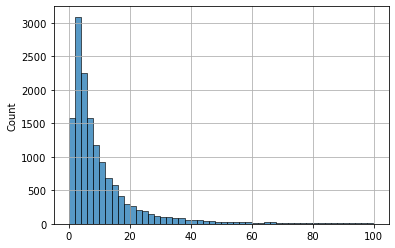

In [26]:
meansnr = (wd_subclass.snru + wd_subclass.snrg + wd_subclass.snrr + wd_subclass.snri + wd_subclass.snrz)/5
sns.histplot(meansnr[meansnr<100], bins=50)
plt.grid()
plt.show()

In [27]:
wd_subclass.groupby('wd_subclass')['obsid'].count()

wd_subclass
DA     13208
DAZ     1438
Name: obsid, dtype: int64

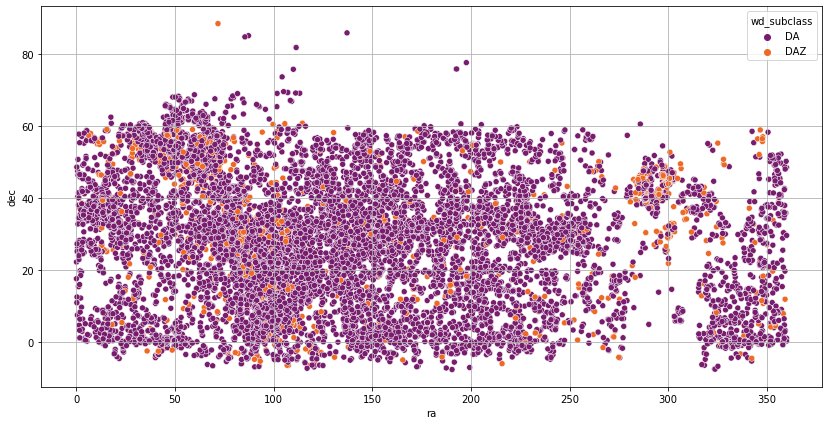

In [108]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=wd_subclass['ra'], y=wd_subclass['dec'], hue=wd_subclass['wd_subclass'], palette = 'inferno')
plt.grid()

In [30]:
wd_subclass['meansnr'] = meansnr.tolist()

C:\Users\pc\AppData\Local\Temp/ipykernel_10848/1526771772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wd_subclass['meansnr'] = meansnr.tolist()


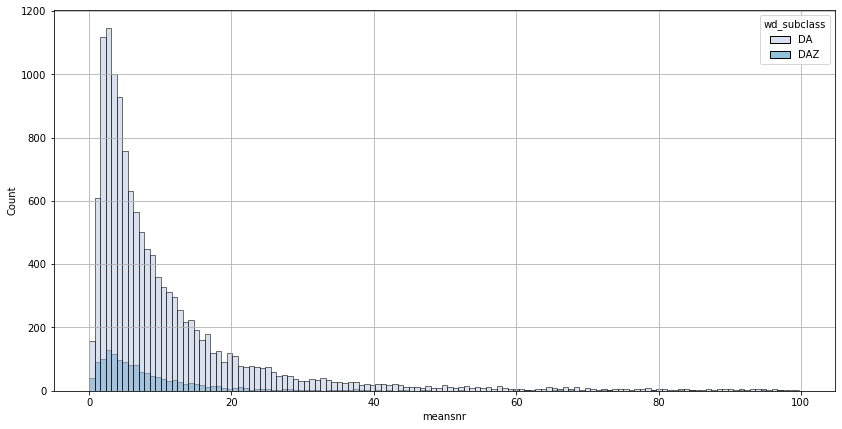

In [97]:
plt.figure(figsize=(14,7))
sns.histplot(x=wd_subclass.meansnr[wd_subclass.meansnr < 100], hue=wd_subclass['wd_subclass'], palette = "PuBu")
sns.color_palette("crest", as_cmap=True)
plt.grid()

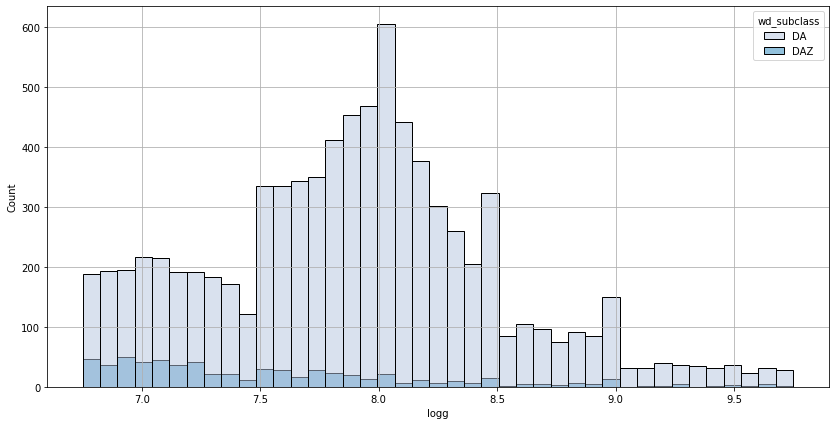

In [101]:
plt.figure(figsize=(14,7))
sns.histplot(x=wd_subclass.logg[wd_subclass.logg != -9999], hue=wd_subclass['wd_subclass'], palette = "PuBu")
sns.color_palette("crest", as_cmap=True)
plt.grid()

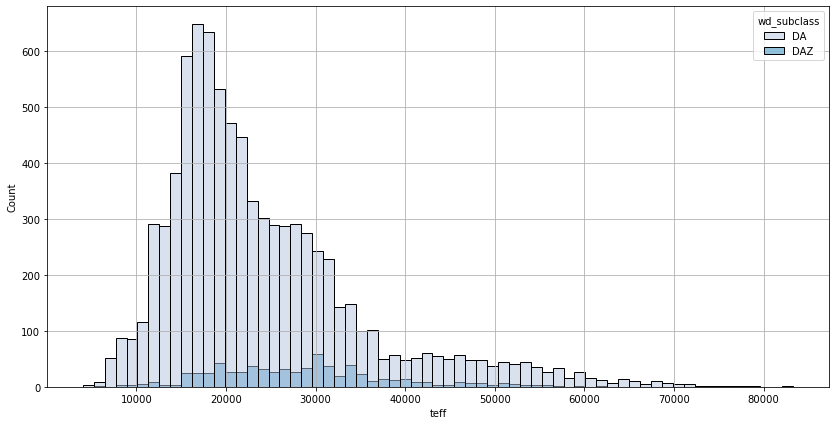

In [103]:
plt.figure(figsize=(14,7))
sns.histplot(x=wd_subclass.teff[wd_subclass.teff != -9999], hue=wd_subclass['wd_subclass'], palette = "PuBu")
sns.color_palette("crest", as_cmap=True)
plt.grid()

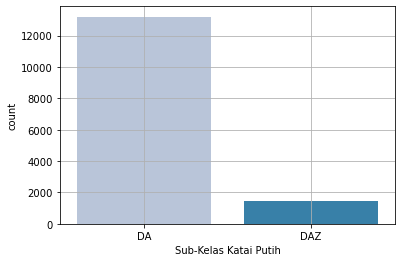

In [104]:

sns.countplot(x=wd_subclass['wd_subclass'], palette='PuBu')
plt.xlabel('Sub-Kelas Katai Putih')
plt.grid()
plt.show()

C:\Users\pc\AppData\Local\Temp/ipykernel_10848/2625524819.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


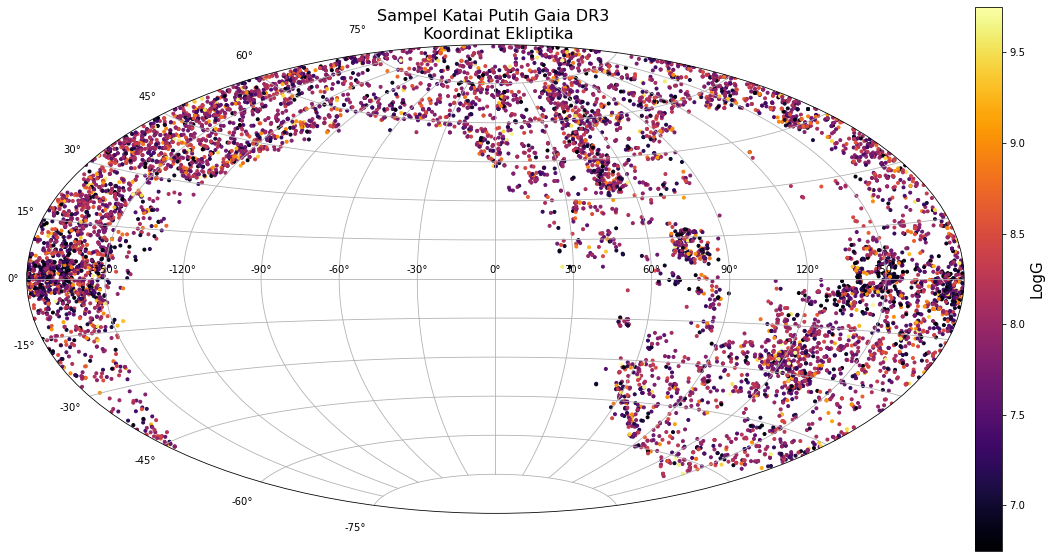

In [48]:
from astropy.coordinates import SkyCoord
import astropy.units as u

df2 = wd_subclass.copy()
fx = df2[(df2.logg > 0) & (df2.logg < 10)]

eq = SkyCoord(fx.ra, fx.dec, unit=u.deg)
gal = eq.galactic

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111,projection="aitoff")
image = ax.scatter(gal.l.wrap_at('180d').radian, gal.b.radian, c=fx.logg, cmap="inferno", marker='.')
bar = fig.colorbar(image,orientation="vertical",pad=0.01)
bar.set_label("LogG",size=15)
plt.title("Sampel Katai Putih Gaia DR3 \n Koordinat Ekliptika", fontsize=16)
plt.grid()
fig.show()

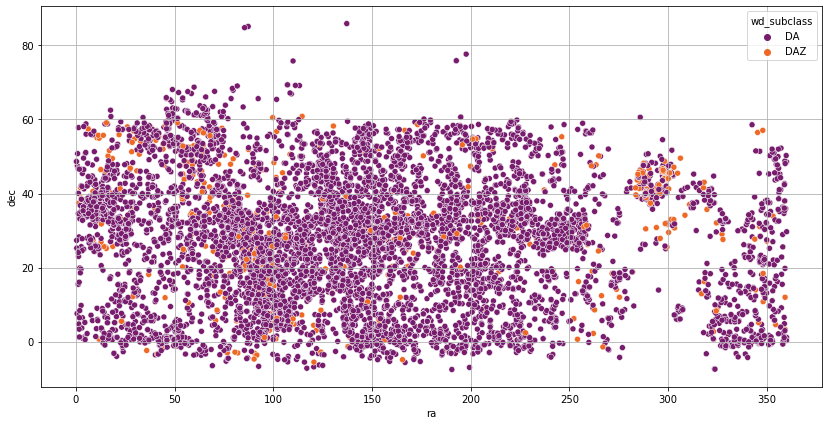

In [50]:
logghr = wd_subclass[wd_subclass.logg != -9999]
plt.figure(figsize=(14,7))
sns.scatterplot(x=logghr['ra'], y=logghr['dec'], hue=logghr['wd_subclass'], palette='inferno')
plt.grid()

C:\Users\pc\AppData\Local\Temp/ipykernel_10848/792844907.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


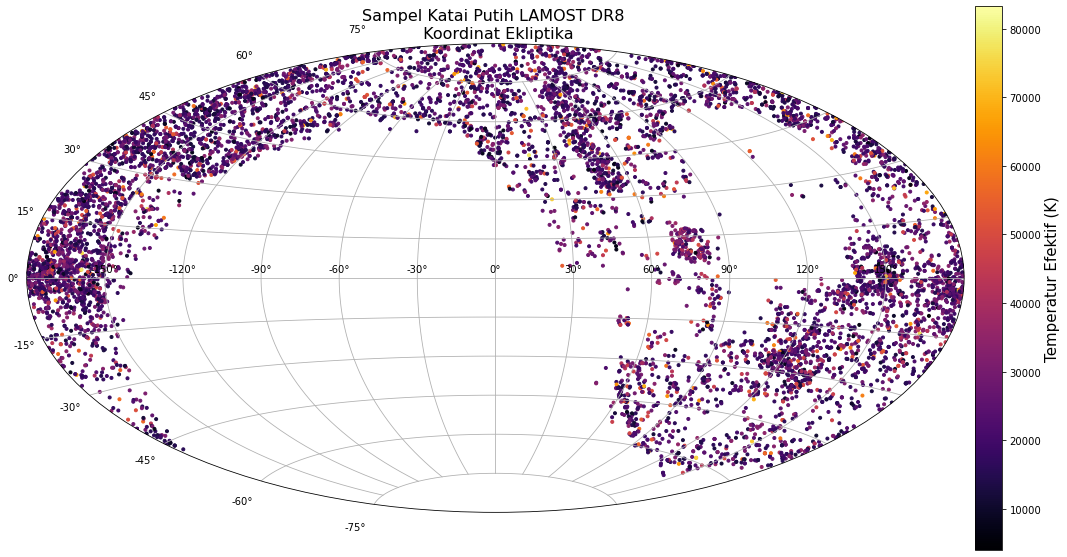

In [62]:
from astropy.coordinates import SkyCoord
import astropy.units as u

df2 = wd_subclass.copy()
fx = df2[df2.teff != -9999]

eq = SkyCoord(fx.ra, fx.dec, unit=u.deg)
gal = eq.galactic

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111,projection="aitoff")
image = ax.scatter(gal.l.wrap_at('180d').radian, gal.b.radian, c=fx.teff, cmap="inferno", marker='.')
bar = fig.colorbar(image,orientation="vertical",pad=0.01)
bar.set_label("Temperatur Efektif (K)",size=15)
plt.title("Sampel Katai Putih LAMOST DR8 \n Koordinat Ekliptika", fontsize=16)
plt.grid()
fig.show()

In [58]:
wd_subclass.to_csv('dataparameter.csv', index=False)

C:\Users\pc\AppData\Local\Temp/ipykernel_10848/4167457984.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


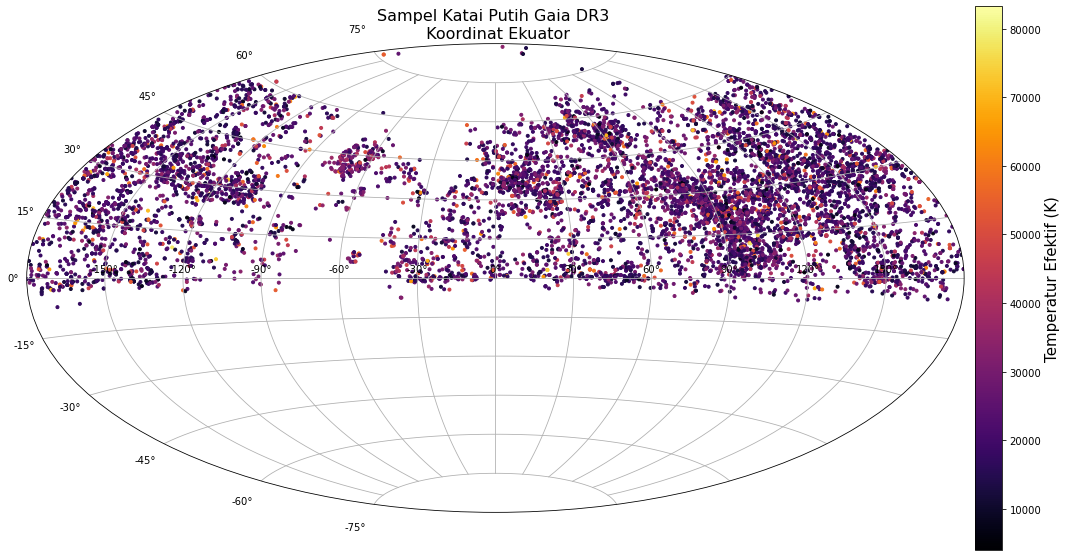

In [61]:
from astropy.coordinates import SkyCoord
import astropy.units as u


fx = wd_subclass[wd_subclass.teff != -9999]

eq = SkyCoord(fx.ra, fx.dec, unit=u.deg)
#gal = eq.galactic

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111,projection="aitoff")
image = ax.scatter(eq.ra.wrap_at('180d').radian, eq.dec.radian, c=fx.teff, cmap="inferno", marker='.')
bar = fig.colorbar(image,orientation="vertical",pad=0.01)
bar.set_label("Temperatur Efektif (K)",size=15)
plt.title("Sampel Katai Putih Gaia DR3 \n Koordinat Ekuator", fontsize=16)
plt.grid()
fig.show()

In [59]:
gaiaparam = pd.read_csv('gaia parameter.csv')
gaiaparam.head(3)

,source_id,solution_id,l,b,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,radial_velocity,radial_velocity_error,mg_gspphot
0,2676893926929699200,1636148068921376768,59.102450,-43.425158,19.046597,19.388786,18.651531,0.737255,NaN,NaN,NaN
1,2677056689010163456,1636148068921376768,59.452081,-43.154906,18.560960,18.552813,18.667006,-0.114193,NaN,NaN,2.7719
2,2679476512239443328,1636148068921376768,64.133633,-43.063243,17.051477,17.069693,17.046430,0.023262,NaN,NaN,NaN


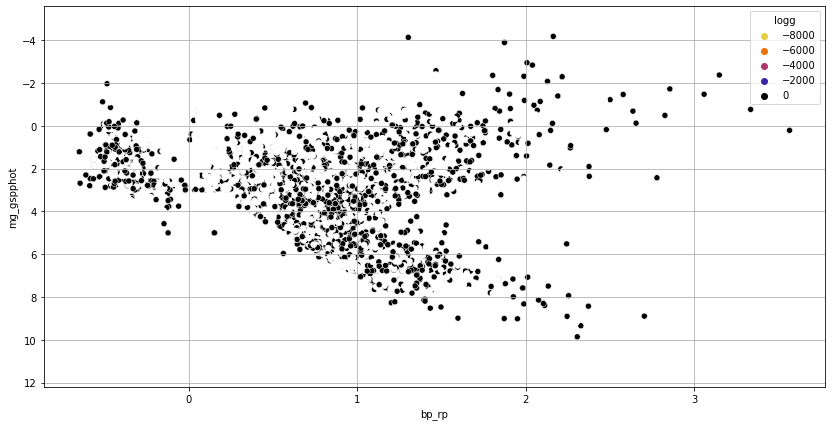

In [68]:
gaiaparam.rename(columns = {'source_id' : 'gaia_source_id'}, inplace = True)
param = pd.merge(gaiaparam, wd_subclass, on = 'gaia_source_id', how = 'inner')
param.dropna(subset=['bp_rp', 'mg_gspphot', 'logg'], inplace=True)
plt.figure(figsize=(14,7))
sns.scatterplot(x=param['bp_rp'], y=param['mg_gspphot'], hue=param['logg'], palette="CMRmap_r")
plt.gca().invert_yaxis()
plt.grid()

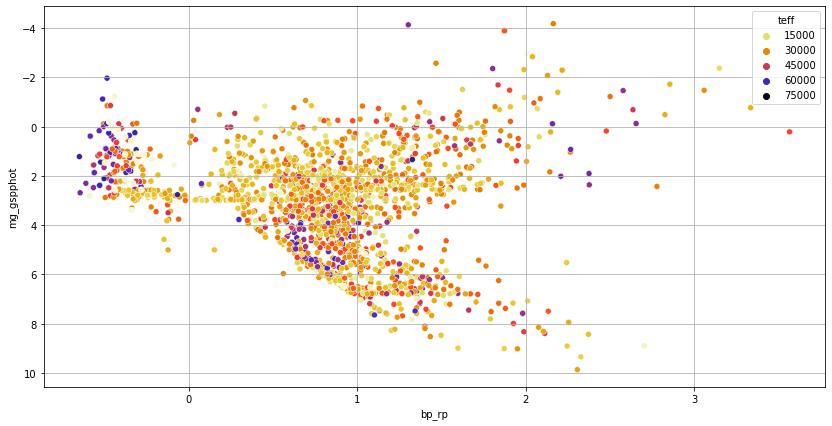

In [81]:
param = param[param['logg'] != -9999]
plt.figure(figsize=(14,7))
sns.scatterplot(x=param['bp_rp'], y=param['mg_gspphot'], hue=param['teff'],  palette="CMRmap_r")
plt.gca().invert_yaxis()
plt.grid()

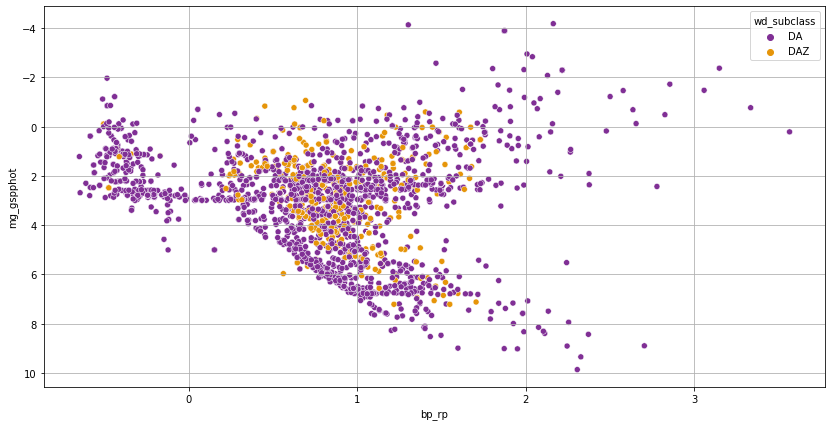

In [112]:

plt.figure(figsize=(14,7))
sns.scatterplot(x=param['bp_rp'], y=param['mg_gspphot'], hue=param['wd_subclass'],  palette="CMRmap")
plt.gca().invert_yaxis()
plt.grid()

In [113]:
wd_subclass[['tfrom','tsource']]

,tfrom,tsource
0,-,JF_LEGAS_S
1,-,JF_LEGAS_S
2,-,JF_LEGAS_S
3,-,JF_LEGAS_S
4,-,R
...,...,...
15596,LAMOST,PILOT
15597,LCH100020,LEGUE_LCH
15598,LSPM,LEGUE_Ljf
15599,LCH100020,LEGUE_LCH


In [57]:
wd_subclass.columns

Index(['obsid', 'uid', 'gp_id', 'designation', 'obsdate', 'lmjd', 'mjd',
       'planid', 'spid', 'fiberid', 'ra_obs', 'dec_obs', 'snru', 'snrg',
       'snrr', 'snri', 'snrz', 'class', 'subclass', 'z', 'z_err', 'ps_id',
       'mag_ps_g', 'mag_ps_r', 'mag_ps_i', 'mag_ps_z', 'mag_ps_y',
       'gaia_source_id', 'gaia_g_mean_mag', 'tsource', 'fibertype', 'tfrom',
       'tcomment', 'offsets', 'offsets_v', 'ra', 'dec', 'wd_subclass', 'teff',
       'teff_err', 'logg', 'logg_err', 'meansnr'],
      dtype='object')

# Tabel data

In [3]:
wd_subclass = df[(df.wd_subclass == 'DA') | (df.wd_subclass == 'DAZ')]
wd_subclass.head(4)

,obsid,uid,gp_id,designation,obsdate,lmjd,mjd,planid,spid,fiberid,...,tcomment,offsets,offsets_v,ra,dec,wd_subclass,teff,teff_err,logg,logg_err
0,101076,G12763484624375,2676893926929699200,J220838.58-013731.7,2011-10-24,55859,55858,F5902,1,76,...,.,0,0.0,332.160763,-1.625490,DA,-9999.00,-9999.00,-9999.000,-9999.000
1,101151,G12762587004699,2677056689010163456,J220823.66-011534.2,2011-10-24,55859,55858,F5902,1,151,...,.,0,0.0,332.098588,-1.259508,DA,24000.00,672.02,8.263,0.076
2,112211,G13351718912434,2679476512239443328,J221640.39+012741.2,2011-10-24,55859,55858,F5902,12,211,...,.,0,0.0,334.168324,1.461445,DA,17122.64,221.39,7.933,0.037
3,116148,G13358737732360,2683213511743993472,J220522.86+021837.5,2011-10-24,55859,55858,F5902,16,148,...,.,0,0.0,331.345250,2.310432,DA,14070.30,215.59,8.063,0.028


C:\Users\pc\AppData\Local\Temp/ipykernel_308/924628992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wd_subclass['meansnr'] = (wd_subclass.snru + wd_subclass.snrg + wd_subclass.snrr + wd_subclass.snri + wd_subclass.snrz)/5


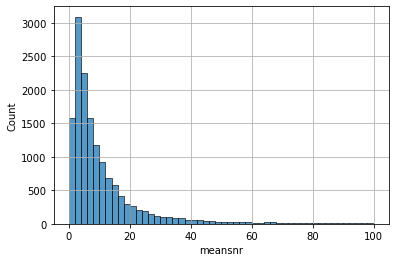

In [16]:
wd_subclass['meansnr'] = (wd_subclass.snru + wd_subclass.snrg + wd_subclass.snrr + wd_subclass.snri + wd_subclass.snrz)/5
sns.histplot(wd_subclass.meansnr[(wd_subclass.meansnr<100) & (wd_subclass.meansnr >= 0)], bins=50)
plt.grid()
plt.show()

In [22]:
wd_subclass.meansnr[(wd_subclass.wd_subclass == 'DAZ') & (wd_subclass.meansnr > 0) & (wd_subclass.meansnr <= 100)].min()

0.046

In [23]:
wd_subclass.meansnr[(wd_subclass.wd_subclass == 'DAZ') & (wd_subclass.meansnr > 0) & (wd_subclass.meansnr <= 100)].max()

97.322